In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('train.csv')

# Explore the data
print(train_data.head())

      id                                         movie_name  \
0  44978                                           Super Me   
1  50185                                     Entity Project   
2  34131  Behavioral Family Therapy for Serious Psychiat...   
3  78522                                      Blood Glacier   
4   2206                                      Apat na anino   

                                            synopsis    genre  
0  A young scriptwriter starts bringing valuable ...  fantasy  
1  A director and her friends renting a haunted h...   horror  
2  This is an educational video for families and ...   family  
3  Scientists working in the Austrian Alps discov...    scifi  
4  Buy Day - Four Men Widely - Apart in Life - By...   action  


In [ ]:
train_data.drop(['id'], axis=1, inplace=True)  # Drop unnecessary columns if needed
train_data.dropna(inplace=True)  # Remove rows with missing values

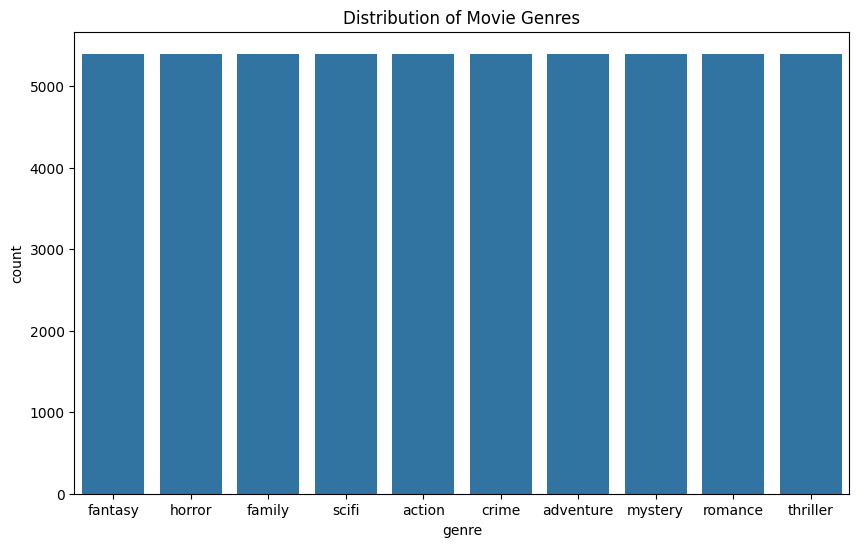

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=train_data)
plt.title('Distribution of Movie Genres')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(train_data['synopsis'])
y_train = train_data['genre']

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data.drop(['id'], axis=1, inplace=True)
test_data.dropna(inplace=True)

In [ ]:
# Vectorize the synopsis in the test data
X_test_vectorized = vectorizer.transform(test_data['synopsis'])

# Predict on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

# Extract true labels from test_data
y_true = test_data['genre']

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.08


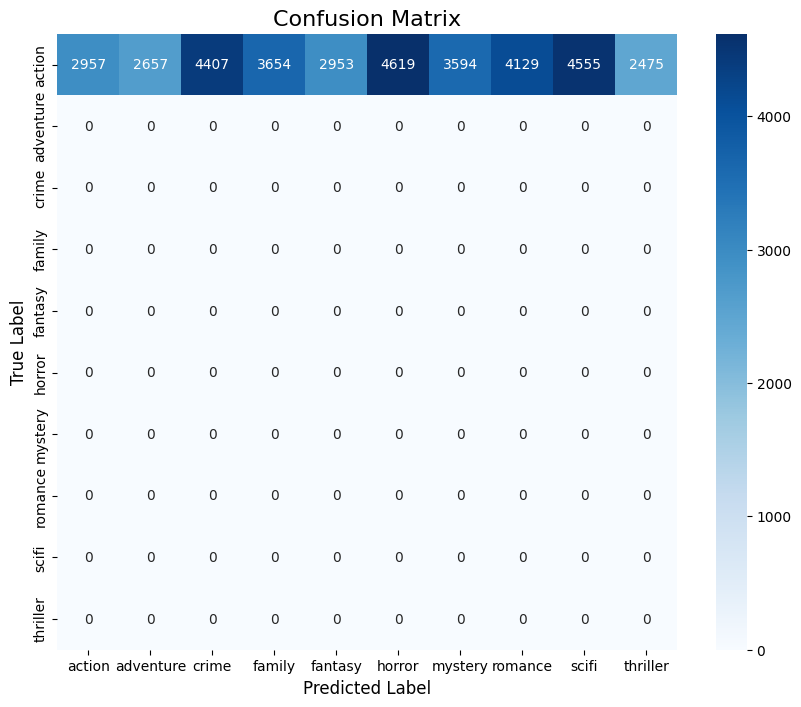

<ipython-input-19-bfcb33e34191>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words, y=[1]*10, palette='viridis')
<ipython-input-19-bfcb33e34191>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words, y=[1]*10, palette='viridis')
<ipython-input-19-bfcb33e34191>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words, y=[1]*10, palette='viridis')
<ipython-input-19-bfcb33e34191>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

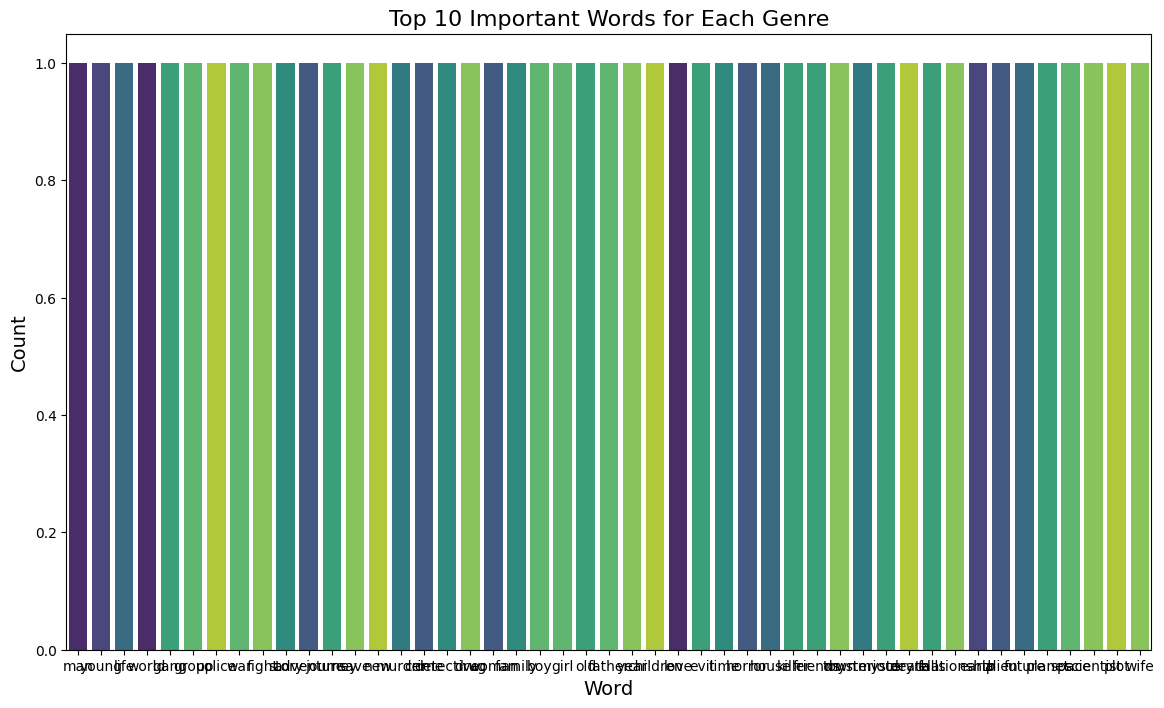

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


# Visualize the top 10 important words for each genre
top_words_per_genre = {}
for i, genre in enumerate(nb_classifier.classes_):
    feature_names = vectorizer.get_feature_names_out()
    top_indices = nb_classifier.feature_log_prob_[i].argsort()[-10:][::-1]
    top_words_per_genre[genre] = [feature_names[i] for i in top_indices]

plt.figure(figsize=(14, 8))
for genre, top_words in top_words_per_genre.items():
    sns.barplot(x=top_words, y=[1]*10, palette='viridis')
plt.title('Top 10 Important Words for Each Genre', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
plt.show()